In [1]:
'''

About Dataset
Context
In today's interconnected world, the issue of inequality in education stands as a stark reminder 
of the disparities that persist across countries and communities. While strides have been made to 
improve access to education, a significant proportion of children still lack the opportunity to learn, 
particularly in low-income and conflict-affected regions. Quality of education also diverges, with 
well-equipped schools in affluent areas contrasting with under-resourced institutions in marginalized settings.
 Gender inequality further compounds the problem, as cultural norms and economic factors often impede girls' education 
 in certain societies. Tackling inequality in education isn't just a matter of fairness; it's a critical step towards 
 building equitable societies and empowering individuals to contribute meaningfully to their own development and that of their nations.

Content
This dataset contains historical data covering a range of indicators pertaining to educational 
inequality on a global scale. The dataset's prominent components include: ISO3, Country, Human Development Groups, 
UNDP Developing Regions, HDI Rank (2021), and Inequality in Education spanning the years 2010 to 2021.

Dataset Glossary (Column-wise)
ISO3 - ISO3 for the Country/Territory
Country - Name of the Country/Territory
Human Development Groups - Human Development Groups
UNDP Developing Regions - UNDP Developing Regions
HDI Rank (2021) - Human Development Index Rank for 2021
Inequality in Education (2010) - Inequality in Education for 2010
Inequality in Education (2011) - Inequality in Education for 2011
Inequality in Education (2012) - Inequality in Education for 2012
Inequality in Education (2013) - Inequality in Education for 2013
Inequality in Education (2014) - Inequality in Education for 2014
Inequality in Education (2015) - Inequality in Education for 2015
Inequality in Education (2016) - Inequality in Education for 2016
Inequality in Education (2017) - Inequality in Education for 2017
Inequality in Education (2018) - Inequality in Education for 2018
Inequality in Education (2019) - Inequality in Education for 2019
Inequality in Education (2020) - Inequality in Education for 2020
Inequality in Education (2021) - Inequality in Education for 2021

Data Dictionary:
UNDP Developing Regions:
SSA - Sub-Saharan Africa
LAC - Latin America and the Caribbean
EAP - East Asia and the Pacific
AS - Arab States
ECA - Europe and Central Asia
SA - South Asia

FOR 'HUMAN DEVELOPMENT GROUPS' column:
indicators are compiled into a single number between 0 and 1.0,
with 1.0 being the highest possible human development. HDI is divided into four tiers: very high human development (0.8-1.0), 
high human development (0.7-0.79), medium human development (0.55-.70), and low human development (below 0.55).
'''

"\n\nAbout Dataset\nContext\nIn today's interconnected world, the issue of inequality in education stands as a stark reminder \nof the disparities that persist across countries and communities. While strides have been made to \nimprove access to education, a significant proportion of children still lack the opportunity to learn, \nparticularly in low-income and conflict-affected regions. Quality of education also diverges, with \nwell-equipped schools in affluent areas contrasting with under-resourced institutions in marginalized settings.\n Gender inequality further compounds the problem, as cultural norms and economic factors often impede girls' education \n in certain societies. Tackling inequality in education isn't just a matter of fairness; it's a critical step towards \n building equitable societies and empowering individuals to contribute meaningfully to their own development and that of their nations.\n\nContent\nThis dataset contains historical data covering a range of indica

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy import stats

In [3]:
path=r"C:\Users\HP\Desktop\CODE\Files for importing in codes\KAGGLE-Inequality in Education.csv"
df=pd.read_csv(path)
df.head(10)

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,AFG,Afghanistan,Low,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
2,ALB,Albania,High,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
3,AND,Andorra,Very High,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,ARE,United Arab Emirates,Very High,AS,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355
5,ARG,Argentina,Very High,LAC,47.0,6.914310,6.830900,6.430560,6.513360,6.192280,6.331310,6.151940,6.208430,5.951810,5.787290,5.787290,5.787290
6,ARM,Armenia,High,ECA,85.0,3.685000,3.685000,3.685000,3.685000,3.685000,3.685000,2.934950,2.934950,2.934950,2.934950,2.934950,2.934950
7,ATG,Antigua and Barbuda,High,LAC,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AUS,Australia,Very High,NaN,5.0,2.746427,2.477821,2.475142,2.935539,2.832901,2.720964,2.672566,3.043233,3.056570,3.056570,3.056570,3.056570
9,AUT,Austria,Very High,NaN,25.0,2.488360,3.667240,3.489860,4.297670,2.658110,2.607560,2.570640,2.999600,2.917450,2.917450,2.522410,2.522410


# DATA WRANGLING:

In [4]:
df.shape

(195, 17)

In [5]:
df.replace('?',np.nan,inplace=True)

In [6]:
null_table=df.isnull()
null_table.head()

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False


In [7]:
#counting null values:

for i in null_table.columns.values.tolist():
    print(i)
    print(null_table[i].value_counts())
    print("")

ISO3
ISO3
False    195
Name: count, dtype: int64

Country
Country
False    195
Name: count, dtype: int64

Human Development Groups
Human Development Groups
False    191
True       4
Name: count, dtype: int64

UNDP Developing Regions
UNDP Developing Regions
False    151
True      44
Name: count, dtype: int64

HDI Rank (2021)
HDI Rank (2021)
False    191
True       4
Name: count, dtype: int64

Inequality in Education (2010)
Inequality in Education (2010)
False    137
True      58
Name: count, dtype: int64

Inequality in Education (2011)
Inequality in Education (2011)
False    150
True      45
Name: count, dtype: int64

Inequality in Education (2012)
Inequality in Education (2012)
False    157
True      38
Name: count, dtype: int64

Inequality in Education (2013)
Inequality in Education (2013)
False    165
True      30
Name: count, dtype: int64

Inequality in Education (2014)
Inequality in Education (2014)
False    168
True      27
Name: count, dtype: int64

Inequality in Education (2015)

In [8]:
df.dtypes
# as the dtypes are already correct we can directly proceed to treating the null values

ISO3                               object
Country                            object
Human Development Groups           object
UNDP Developing Regions            object
HDI Rank (2021)                   float64
Inequality in Education (2010)    float64
Inequality in Education (2011)    float64
Inequality in Education (2012)    float64
Inequality in Education (2013)    float64
Inequality in Education (2014)    float64
Inequality in Education (2015)    float64
Inequality in Education (2016)    float64
Inequality in Education (2017)    float64
Inequality in Education (2018)    float64
Inequality in Education (2019)    float64
Inequality in Education (2020)    float64
Inequality in Education (2021)    float64
dtype: object

In [ ]:
# treating null values:(replacing with mean)
df['Inequality in Education (2010)'].replace(np.nan,df['Inequality in Education (2010)'].mean(),inplace=True)
df['Inequality in Education (2011)'].replace(np.nan,df['Inequality in Education (2011)'].mean(),inplace=True)
df['Inequality in Education (2012)'].replace(np.nan,df['Inequality in Education (2012)'].mean(),inplace=True)
df['Inequality in Education (2013)'].replace(np.nan,df['Inequality in Education (2013)'].mean(),inplace=True)
df['Inequality in Education (2014)'].replace(np.nan,df['Inequality in Education (2014)'].mean(),inplace=True)
df['Inequality in Education (2015)'].replace(np.nan,df['Inequality in Education (2015)'].mean(),inplace=True)
df['Inequality in Education (2016)'].replace(np.nan,df['Inequality in Education (2016)'].mean(),inplace=True)
df['Inequality in Education (2017)'].replace(np.nan,df['Inequality in Education (2017)'].mean(),inplace=True)
df['Inequality in Education (2018)'].replace(np.nan,df['Inequality in Education (2018)'].mean(),inplace=True)
df['Inequality in Education (2019)'].replace(np.nan,df['Inequality in Education (2019)'].mean(),inplace=True)
df['Inequality in Education (2020)'].replace(np.nan,df['Inequality in Education (2020)'].mean(),inplace=True)
df['Inequality in Education (2021)'].replace(np.nan,df['Inequality in Education (2021)'].mean(),inplace=True)
df['HDI Rank (2021)'].replace(np.nan,df['HDI Rank (2021)'].mean(),inplace=True)

leaving 'UNDP Developing Regions' null values as it is

In [10]:
#treating null values(with mode):
df['Human Development Groups'].value_counts().idxmax()

'Very High'

In [11]:
df['Human Development Groups'].replace(np.nan,'Very High',inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18024\591992649.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Human Development Groups'].replace(np.nan,'Very High',inplace=True)


In [12]:
df.head(10)

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,AFG,Afghanistan,Low,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,AGO,Angola,Medium,SSA,148.0,20.654419,19.991823,19.473658,19.258472,19.135457,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
2,ALB,Albania,High,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
3,AND,Andorra,Very High,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,ARE,United Arab Emirates,Very High,AS,26.0,20.654419,19.991823,19.473658,19.258472,19.135457,19.133751,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355
5,ARG,Argentina,Very High,LAC,47.0,6.914310,6.830900,6.430560,6.513360,6.192280,6.331310,6.151940,6.208430,5.951810,5.787290,5.787290,5.787290
6,ARM,Armenia,High,ECA,85.0,3.685000,3.685000,3.685000,3.685000,3.685000,3.685000,2.934950,2.934950,2.934950,2.934950,2.934950,2.934950
7,ATG,Antigua and Barbuda,High,LAC,71.0,20.654419,19.991823,19.473658,19.258472,19.135457,19.133751,18.853851,18.649140,18.396401,18.212993,18.006314,18.006314
8,AUS,Australia,Very High,NaN,5.0,2.746427,2.477821,2.475142,2.935539,2.832901,2.720964,2.672566,3.043233,3.056570,3.056570,3.056570,3.056570
9,AUT,Austria,Very High,NaN,25.0,2.488360,3.667240,3.489860,4.297670,2.658110,2.607560,2.570640,2.999600,2.917450,2.917450,2.522410,2.522410


In [13]:
## Standardizaiton:rounding off upto two decimals only
df[['Inequality in Education (2010)']]=np.round(df[['Inequality in Education (2010)']],2)
df[['Inequality in Education (2011)']]=np.round(df[['Inequality in Education (2011)']],2)
df[['Inequality in Education (2012)']]=np.round(df[['Inequality in Education (2012)']],2)
df[['Inequality in Education (2013)']]=np.round(df[['Inequality in Education (2013)']],2)
df[['Inequality in Education (2014)']]=np.round(df[['Inequality in Education (2014)']],2)
df[['Inequality in Education (2015)']]=np.round(df[['Inequality in Education (2015)']],2)
df[['Inequality in Education (2016)']]=np.round(df[['Inequality in Education (2016)']],2)
df[['Inequality in Education (2017)']]=np.round(df[['Inequality in Education (2017)']],2)
df[['Inequality in Education (2018)']]=np.round(df[['Inequality in Education (2018)']],2)
df[['Inequality in Education (2019)']]=np.round(df[['Inequality in Education (2019)']],2)
df[['Inequality in Education (2020)']]=np.round(df[['Inequality in Education (2020)']],2)
df[['Inequality in Education (2021)']]=np.round(df[['Inequality in Education (2021)']],2)


In [14]:
df.head(10)

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,AFG,Afghanistan,Low,SA,180.0,42.81,44.82,44.82,44.82,44.82,45.37,45.37,45.37,45.37,45.37,45.37,45.37
1,AGO,Angola,Medium,SSA,148.0,20.65,19.99,19.47,19.26,19.14,34.17,34.17,34.17,34.17,34.17,34.17,34.17
2,ALB,Albania,High,ECA,67.0,11.90,11.90,11.90,11.90,11.90,11.90,11.90,12.33,12.33,12.33,12.33,12.33
3,AND,Andorra,Very High,NaN,40.0,15.16,15.16,15.16,15.16,9.97,10.08,10.01,10.01,10.01,10.01,10.01,10.01
4,ARE,United Arab Emirates,Very High,AS,26.0,20.65,19.99,19.47,19.26,19.14,19.13,18.24,14.48,12.63,12.63,12.63,12.63
5,ARG,Argentina,Very High,LAC,47.0,6.91,6.83,6.43,6.51,6.19,6.33,6.15,6.21,5.95,5.79,5.79,5.79
6,ARM,Armenia,High,ECA,85.0,3.68,3.68,3.68,3.68,3.68,3.68,2.93,2.93,2.93,2.93,2.93,2.93
7,ATG,Antigua and Barbuda,High,LAC,71.0,20.65,19.99,19.47,19.26,19.14,19.13,18.85,18.65,18.40,18.21,18.01,18.01
8,AUS,Australia,Very High,NaN,5.0,2.75,2.48,2.48,2.94,2.83,2.72,2.67,3.04,3.06,3.06,3.06,3.06
9,AUT,Austria,Very High,NaN,25.0,2.49,3.67,3.49,4.30,2.66,2.61,2.57,3.00,2.92,2.92,2.52,2.52


In [15]:
# all values are nearly in same range and dosent require normalization
#binning and indiactor variables are also not required

In [16]:
df.to_csv(r"C:\Users\HP\Desktop\CODE\DATA ANALYSIS with PYTHON\cleaned_data_for_6(inequality_in_education-KAGGLE data).csv")

---------------------------------------------------END OF DATA WRANGLING------------------------------------------------

# Exploratory Data Analysis:(HDI rank is our Target variable)

In [17]:
# taking all the numerical variables:


In [18]:
#correlation for continous numerical variables:

df[['HDI Rank (2021)',
       'Inequality in Education (2010)', 'Inequality in Education (2011)',
       'Inequality in Education (2012)', 'Inequality in Education (2013)',
       'Inequality in Education (2014)', 'Inequality in Education (2015)',
       'Inequality in Education (2016)', 'Inequality in Education (2017)',
       'Inequality in Education (2018)', 'Inequality in Education (2019)',
       'Inequality in Education (2020)', 'Inequality in Education (2021)']].corr()

#almost all of them have a positive correlation with HDI rank

,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
HDI Rank (2021),1.000000,0.702976,0.716174,0.730063,0.754154,0.756889,0.772733,0.782687,0.783205,0.782940,0.780593,0.777016,0.777016
Inequality in Education (2010),0.702976,1.000000,0.933779,0.869210,0.832801,0.825710,0.811279,0.802437,0.804001,0.817846,0.814535,0.816612,0.816612
Inequality in Education (2011),0.716174,0.933779,1.000000,0.935222,0.895447,0.886649,0.871646,0.862788,0.854983,0.848482,0.850355,0.851393,0.851393
Inequality in Education (2012),0.730063,0.869210,0.935222,1.000000,0.957899,0.949672,0.934236,0.918725,0.910773,0.901526,0.903197,0.903925,0.903925
Inequality in Education (2013),0.754154,0.832801,0.895447,0.957899,1.000000,0.991912,0.979302,0.964543,0.956912,0.944100,0.944950,0.944590,0.944590
Inequality in Education (2014),0.756889,0.825710,0.886649,0.949672,0.991912,1.000000,0.987320,0.972904,0.965041,0.952357,0.953079,0.952448,0.952448
Inequality in Education (2015),0.772733,0.811279,0.871646,0.934236,0.979302,0.987320,1.000000,0.985277,0.974515,0.961367,0.962285,0.961627,0.961627
Inequality in Education (2016),0.782687,0.802437,0.862788,0.918725,0.964543,0.972904,0.985277,1.000000,0.989401,0.977088,0.978080,0.975101,0.975101
Inequality in Education (2017),0.783205,0.804001,0.854983,0.910773,0.956912,0.965041,0.974515,0.989401,1.000000,0.987370,0.982695,0.979733,0.979733
Inequality in Education (2018),0.782940,0.817846,0.848482,0.901526,0.944100,0.952357,0.961367,0.977088,0.987370,1.000000,0.995206,0.992116,0.992116


In [19]:
#finding correlation and p-value

col_list=[df['Inequality in Education (2010)'], df['Inequality in Education (2011)'],
       df['Inequality in Education (2012)'], df['Inequality in Education (2013)'],
       df['Inequality in Education (2014)'], df['Inequality in Education (2015)'],
       df['Inequality in Education (2016)'], df['Inequality in Education (2017)'],
       df['Inequality in Education (2018)'], df['Inequality in Education (2019)'],
       df['Inequality in Education (2020)'], df['Inequality in Education (2021)']]

corr_list=[]
p_list=[]

def corr_calc(a):
    x,y=stats.pearsonr(a,df['HDI Rank (2021)'])
    print(f"{a.name}")
    print(f"corr. coef: {x}")
    print(f"p-value: {y}")
    print("")

    corr_list.append(x)
    p_list.append(y)

for i in col_list:
    corr_calc(i)

print(f"max correlation is: {max(corr_list)}\n")
print(f"The minimum p- value is: {min(p_list)}")


Inequality in Education (2010)
corr. coef: 0.7029758722602456
p-value: 2.215283091131346e-30

Inequality in Education (2011)
corr. coef: 0.7161739415229826
p-value: 5.704263447701724e-32

Inequality in Education (2012)
corr. coef: 0.7300628300634578
p-value: 9.618979251889582e-34

Inequality in Education (2013)
corr. coef: 0.7541542255745404
p-value: 4.275247397085097e-37

Inequality in Education (2014)
corr. coef: 0.7568889047814673
p-value: 1.6823170462033219e-37

Inequality in Education (2015)
corr. coef: 0.7727330597114284
p-value: 5.873697329902992e-40

Inequality in Education (2016)
corr. coef: 0.782687020027155
p-value: 1.321684100892622e-41

Inequality in Education (2017)
corr. coef: 0.7832047121440151
p-value: 1.079087032238876e-41

Inequality in Education (2018)
corr. coef: 0.7829396600058869
p-value: 1.1972313121803e-41

Inequality in Education (2019)
corr. coef: 0.7805934794049778
p-value: 2.9842706643367485e-41

Inequality in Education (2020)
corr. coef: 0.7770155287104128

In [20]:
'''

1.Inequality in Education (2017)
corr. coef: 0.7832047121440151
p-value: 1.079087032238876e-41

This has the maximum corr and minimum p value

2.Inequality in Education (2018)
corr. coef: 0.7829396600058869
p-value: 1.1972313121803e-41

This is on second number

3.Inequality in Education (2016)
corr. coef: 0.782687020027155
p-value: 1.321684100892622e-41

This is on third number

Thus we will use these columns for training the model


'''


'\n\n1.Inequality in Education (2017)\ncorr. coef: 0.7832047121440151\np-value: 1.079087032238876e-41\n\nThis has the maximum corr and minimum p value\n\n2.Inequality in Education (2018)\ncorr. coef: 0.7829396600058869\np-value: 1.1972313121803e-41\n\nThis is on second number\n\n3.Inequality in Education (2016)\ncorr. coef: 0.782687020027155\np-value: 1.321684100892622e-41\n\nThis is on third number\n\nThus we will use these columns for training the model\n\n\n'

<Axes: xlabel='Inequality in Education (2017)', ylabel='HDI Rank (2021)'>

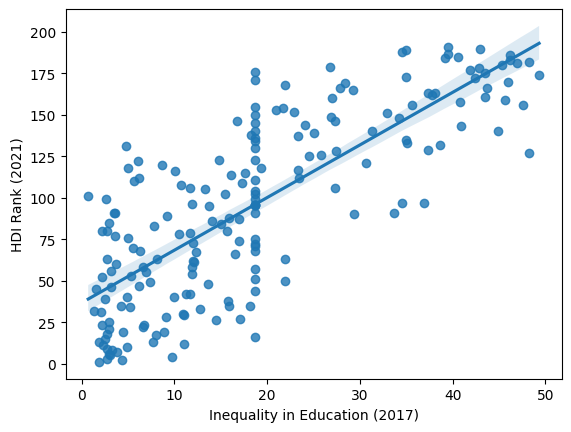

In [21]:
#making regplots for selected variables:
sns.regplot(x='Inequality in Education (2017)',y='HDI Rank (2021)',data=df)
# a decent plot

<Axes: xlabel='Inequality in Education (2018)', ylabel='HDI Rank (2021)'>

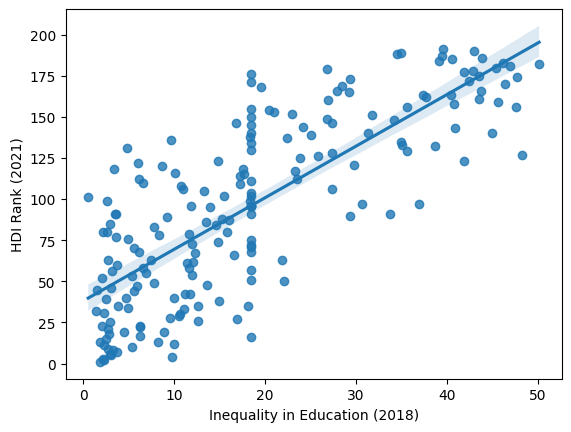

In [22]:
#making regplots for selected variables:
sns.regplot(x='Inequality in Education (2018)',y='HDI Rank (2021)',data=df)
# a decent plot

<Axes: xlabel='Inequality in Education (2016)', ylabel='HDI Rank (2021)'>

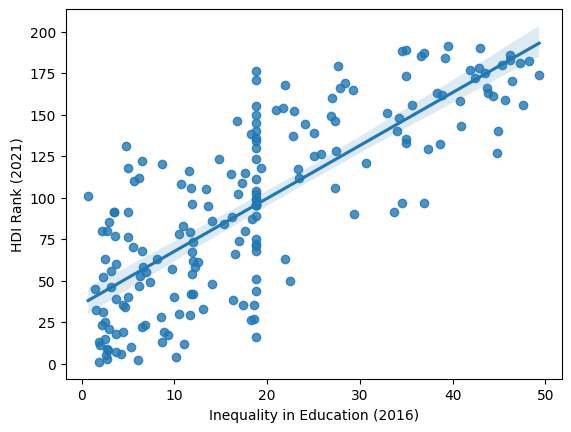

In [23]:
#making regplots for selected variables:
sns.regplot(x='Inequality in Education (2016)',y='HDI Rank (2021)',data=df)
# a decent plot

In [24]:
#boxplots for categorical variables:
df.describe(include=['object'])

,ISO3,Country,Human Development Groups,UNDP Developing Regions
count,195,195,195,151
unique,195,195,4,6
top,AFG,Afghanistan,Very High,SSA
freq,1,1,70,46


<Axes: xlabel='Human Development Groups', ylabel='HDI Rank (2021)'>

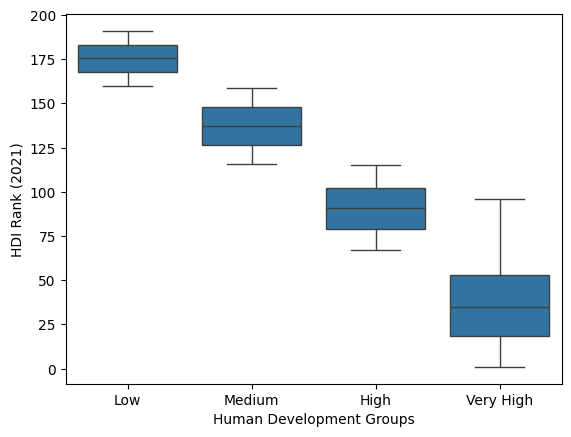

In [25]:
sns.boxplot(x='Human Development Groups',y='HDI Rank (2021)',data=df)

#The plot has clear distinctions and hence must be definitely used to predict the model

<Axes: xlabel='Country', ylabel='HDI Rank (2021)'>

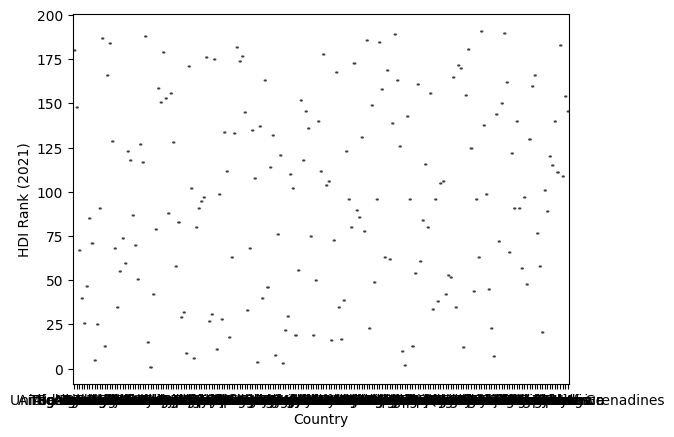

In [26]:
sns.boxplot(x='Country',y='HDI Rank (2021)',data=df)
# all the data is unique(country names) and non repetitive and this variable cannot be used for the prediction purposes

<Axes: xlabel='UNDP Developing Regions', ylabel='HDI Rank (2021)'>

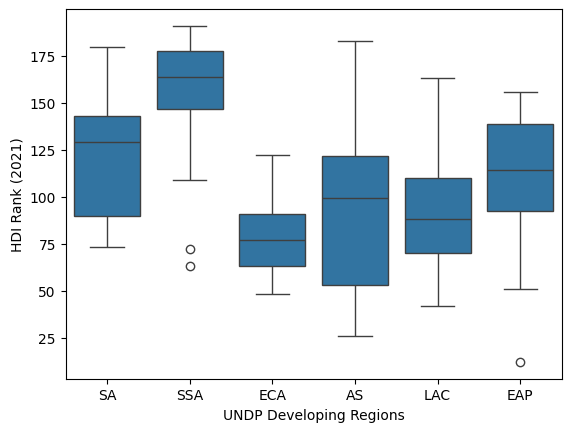

In [27]:
sns.boxplot(x='UNDP Developing Regions',y='HDI Rank (2021)',data=df)	

#overlapping data,but we can still consider it

### Selected variables(for predictions) :
1.UNDP Developing Regions

2.Human Development Groups

3.Inequality in Education (2016)

4.Inequality in Education (2017)

5.Inequality in Education (2018)

------------------------------------------------END OF EDA--------------------------------------------------

# Model Building and Evaluation:

In any kind of regression, wether slr mlr or polynomial, only continous numerical variables are used

## SLR:

In [33]:
#model 1:

x1=df[['Inequality in Education (2018)']]
y1=df['HDI Rank (2021)']

lm1=LinearRegression()

lm1.fit(x1,y1)



LinearRegression()

In [34]:
yhat1=lm1.predict(x1)

yhat1[0:5]

array([180.44891606, 145.30462492,  76.7732572 ,  69.49336833,
        77.71462215])

In [49]:
lm1.intercept_

np.float64(38.08315812398494)

In [50]:
lm1.coef_

array([3.13788314])

<Axes: xlabel='Inequality in Education (2018)', ylabel='HDI Rank (2021)'>

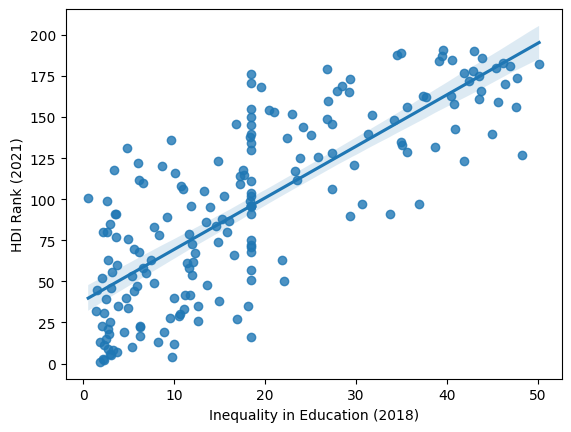

In [40]:
sns.regplot(x='Inequality in Education (2018)',y='HDI Rank (2021)',data=df)

<Axes: xlabel='Inequality in Education (2018)', ylabel='HDI Rank (2021)'>

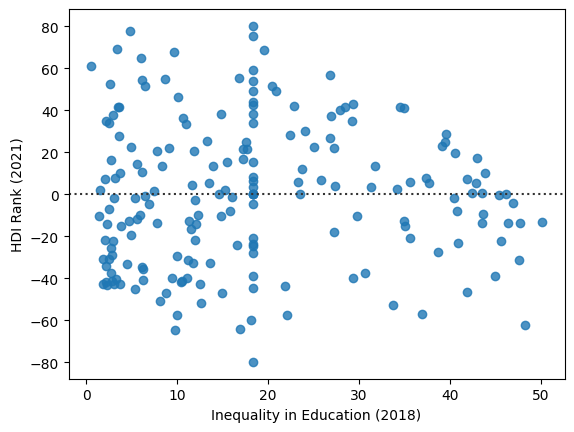

In [ ]:
sns.residplot(x=df['Inequality in Education (2018)'],y=df['HDI Rank (2021)'])
#everything is fine except consistency of variane(no curvature and random distribution along x axis)

In [38]:
#model 2:

x2=df[['Inequality in Education (2016)']]
y2=df['HDI Rank (2021)']

lm2=LinearRegression()

lm2.fit(x2,y2)

LinearRegression()

In [39]:
yhat2=lm2.predict(x2)

yhat2[0:5]

array([180.3713812 , 144.65547419,  73.63821979,  67.61116048,
        93.85597429])

In [52]:
lm2.intercept_

np.float64(35.69006858033088)

In [53]:
lm2.coef_

array([3.18892027])

<Axes: xlabel='Inequality in Education (2016)', ylabel='HDI Rank (2021)'>

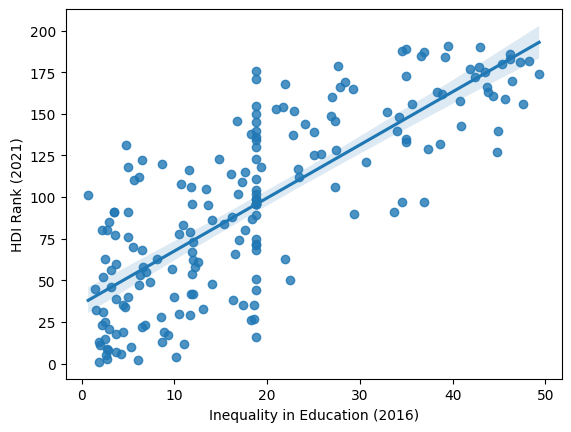

In [41]:
sns.regplot(x='Inequality in Education (2016)',y='HDI Rank (2021)',data=df)

<Axes: xlabel='Inequality in Education (2016)', ylabel='HDI Rank (2021)'>

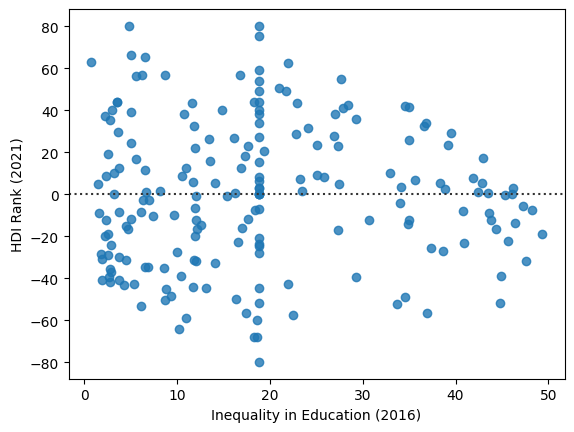

In [60]:
sns.residplot(x=df['Inequality in Education (2016)'],y=df['HDI Rank (2021)'])
#everything is fine except consistency of variane(no curvature and random distribution along x axis)

In [42]:
#model 3:

x3=df[['Inequality in Education (2017)']]
y3=df['HDI Rank (2021)']

lm3=LinearRegression()

lm3.fit(x3,y3)

LinearRegression()

In [43]:
yhat3=lm3.predict(x3)

yhat3[0:5]

array([180.61568854, 145.07005368,  75.75606569,  68.39304132,
        82.57955809])

In [54]:
lm3.intercept_

np.float64(36.624130157313004)

In [55]:
lm3.coef_

array([3.1737174])

<Axes: xlabel='Inequality in Education (2017)', ylabel='HDI Rank (2021)'>

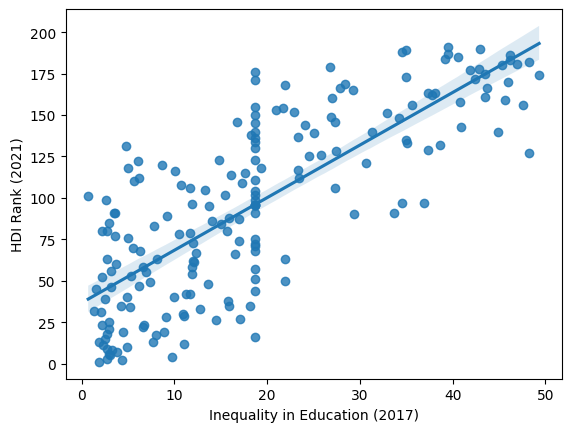

In [44]:
sns.regplot(x='Inequality in Education (2017)',y='HDI Rank (2021)',data=df)

<Axes: xlabel='Inequality in Education (2017)', ylabel='HDI Rank (2021)'>

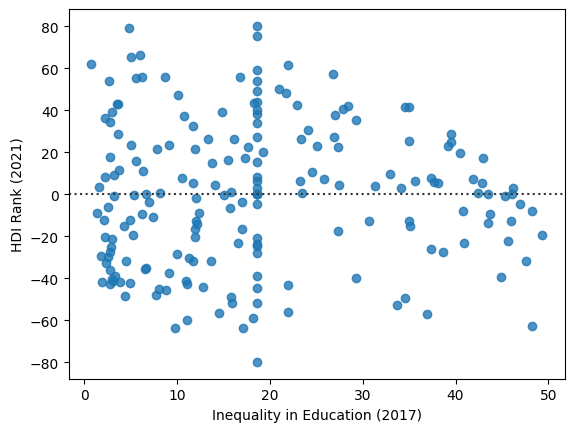

In [61]:
sns.residplot(x=df['Inequality in Education (2017)'],y=df['HDI Rank (2021)'])
#everything is fine except consistency of variane(no curvature and random distribution along x axis)

## MLR:

In [47]:
# Taking all the possible variables

z=df[['Inequality in Education (2010)', 'Inequality in Education (2011)',
       'Inequality in Education (2012)', 'Inequality in Education (2013)',
       'Inequality in Education (2014)', 'Inequality in Education (2015)',
       'Inequality in Education (2016)', 'Inequality in Education (2017)',
       'Inequality in Education (2018)', 'Inequality in Education (2019)',
       'Inequality in Education (2020)', 'Inequality in Education (2021)']]
#This is going to be an 8 variable MLR(and hence will also have 8 coefficients too)

lm4=LinearRegression()
lm4.fit(z,df['HDI Rank (2021)'])




LinearRegression()

In [48]:
yhat4=lm4.predict(z)
yhat4[0:5]

array([183.93920601, 164.13351219,  70.87358827,  70.1184708 ,
        87.47005576])

In [56]:
lm4.intercept_

np.float64(29.242897971649967)

In [57]:
lm4.coef_
#12 coefficients for each variable in our MLR model

array([ 1.06609183,  0.09156547, -0.29813619,  0.34162824, -2.23690732,
        1.74832265,  1.23618439,  0.83170698,  0.72325189,  1.20021045,
       -0.62979162, -0.62979162])

C:\Users\HP\AppData\Local\Temp\ipykernel_18024\3835503524.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(df['HDI Rank (2021)'],hist=False,color='r',label='Actual values of HDI')
C:\Users\HP\AppData\Local\Temp\ipykernel_18024\3835503524.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

<Axes: xlabel='HDI Rank (2021)', ylabel='Density'>

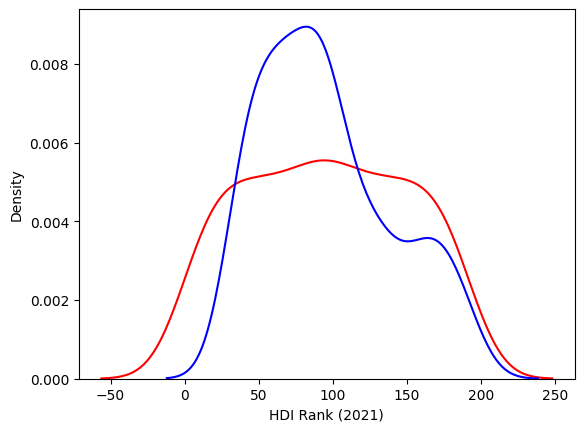

In [62]:
#plotting distribution plot

ax1=sns.distplot(df['HDI Rank (2021)'],hist=False,color='r',label='Actual values of HDI')
sns.distplot(yhat4,hist=False,color='b',label='Predicted values of HDI',ax=ax1)

#not very good but decent enough plot

## Polynomial Regression:

In [76]:
predictor=df['Inequality in Education (2018)']
target=df['HDI Rank (2021)']

func=np.polyfit(predictor,target,3)#fitting a higher order curve to our points
eq=np.poly1d(func)

print(eq)

           3           2
-0.001823 x + 0.09212 x + 2.467 x + 35.28


In [77]:
yhat5=eq(predictor)
yhat5[0:5]

array([166.58458329, 154.40166058,  76.28001248,  67.37112554,
        77.45432635])

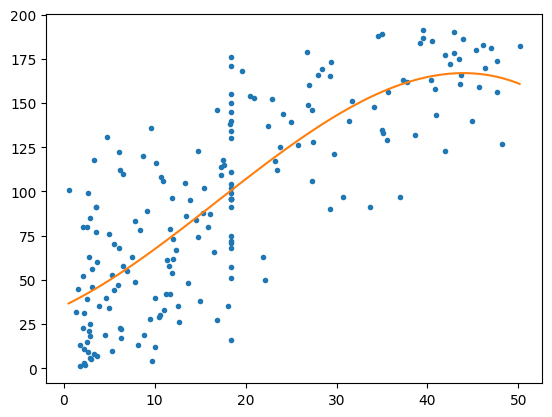

In [78]:
#plotting our model:
x_new = np.linspace(predictor.min(),predictor.max(),100)
y_new = eq(x_new)

plt.plot(predictor, target, '.', x_new, y_new, '-')


## Evaluation:

### MSE:

In [85]:
mse1=mean_squared_error(y1,yhat1)
mse1

np.float64(1153.4573851781938)

In [86]:
mse2=mean_squared_error(y2,yhat2)
mse2

np.float64(1154.6362790745084)

In [93]:
mse3=mean_squared_error(y3,yhat3)
mse3

np.float64(1152.2201634581947)

In [94]:
mse4=mean_squared_error(y1,yhat4)#y1 is nothing but the actual value of y;all y1,y2,y3 are just same
mse4

np.float64(1077.1071654493144)

In [95]:
mse5=mean_squared_error(target,eq(predictor))
mse5

np.float64(1103.8431573775686)

### R^2:

In [108]:
r1=lm1.score(x1,y1)
r1

0.6129945112101337

In [109]:
r2=lm2.score(x2,y2)
r2

0.6125989713189881

In [110]:
r3=lm3.score(x3,y3)
r3

0.6134096211245895

In [113]:
r4=lm4.score(z,y1)
r4

0.6386113692623485

In [114]:
r5=r2_score(y1,eq(predictor))
r5

0.6296409679649677

In [118]:
# Comparison:

r2_list=[r1,r2,r3,r4,r5]
mse_list=[mse1,mse2,mse3,mse4,mse5]



In [119]:
dictionary={'model_name':['SLR1','SLR2','SLR3','MLR','POLY'],
            'r_scores':r2_list,
            'mse_values':mse_list}
concluding_df=pd.DataFrame(dictionary)

In [120]:
concluding_df

,model_name,r_scores,mse_values
0,SLR1,0.612995,1153.457385
1,SLR2,0.612599,1154.636279
2,SLR3,0.613410,1152.220163
3,MLR,0.638611,1077.107165
4,POLY,0.629641,1103.843157


In [121]:
#selecting best model for prediction:

concluding_df['r_scores'].max()
#its maximum for MLR model

np.float64(0.6386113692623485)

In [122]:
concluding_df['mse_values'].min()
#The MLR model again has the least mse

np.float64(1077.1071654493144)

### The selected model for prediction is : MLR (lm4)

---------------------------------------------------------------END-----------------------------------------------